In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

dataset = loadmat('face_emotion_data.mat')

X, y = dataset['X'], dataset['y']
n, p = np.shape(X)

y[y==-1] = 0  # use 0/1 for labels instead of -1/+1
X = np.hstack((np.ones((n,1)), X))  # append a column of ones

Neural network definition

In [23]:
def logsig(_x):
    return 1/(1+np.exp(-_x))

def neural_net(L, X, y, V, W):
    alpha = 0.05 #step size

    for epoch in range(L):
      ind = np.random.permutation(np.shape(X)[0])
      for i in ind:
          # Forward-propagate
          H = logsig(np.hstack((np.ones((1,1)), X[[i],:]@W)))
          Yhat = logsig(H@V)
          # Backpropagate
          delta = (Yhat-y[[i],:])*Yhat*(1-Yhat)
          Vnew = V-alpha*H.T@delta
          gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
          Wnew = W - alpha*X[[i],:].T@gamma
          V = Vnew
          W = Wnew
      #print('epoch: ', epoch)

    return W, V

Varied epoch numbers

In [30]:
error_rates = []

q = np.shape(y)[1] #number of classification problems
M = 32 #number of hidden nodes

## initial weights
V_init = np.random.randn(M+1, q); 
W_init = np.random.randn(p+1, M);

for e in range(1, 100):
    W, V = neural_net(e, X, y, V_init, W_init)

    ## Final predicted labels (on training data)
    H = logsig(np.hstack((np.ones((n,1)), X@W)))
    Yhat = logsig(H@V)    
    Yhat = np.array([[1 if i > 0.5 else 0 for i in Yhat]]).transpose()

    # error calculation
    errors = [0 if i[0]==i[1] else 1 for i in np.hstack((y, Yhat))]
    error_rates.append(sum(errors)/np.shape(y)[0])

In [31]:
print(list(error_rates).index(0.0))

35


Text(0, 0.5, 'Error Rate')

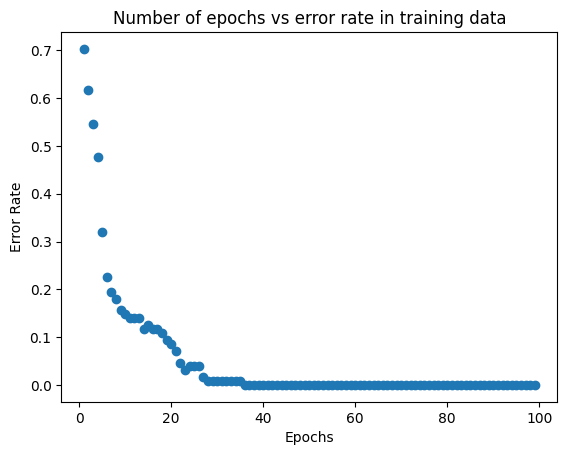

In [32]:
plt.scatter(range(1,100), error_rates)

plt.title("Number of epochs vs error rate in training data")
plt.xlabel("Epochs")
plt.ylabel("Error Rate")

8-fold cross validation

In [33]:
error_rate = []

q = np.shape(y)[1] #number of classification problems
M = 32 #number of hidden nodes

## initial weights
V_init = np.random.randn(M+1, q); 
W_init = np.random.randn(p+1, M);

# for each epoche size
for e in range(1, 100):
  eight_sets = np.split(X, 8)
  eight_y = np.split(y, 8)
  total_error = 0

  # cross validation
  for i in range(8):
    # remove one set from the eight
    training = np.delete(eight_sets, i, axis=0).reshape(-1, 10)
    training_y = np.delete(eight_y, i, axis=0).reshape(112, -1)

    W, V = neural_net(e, training, training_y, V_init, W_init)

    ## Final predicted labels (on training data)
    H = logsig(np.hstack((np.ones((16,1)), eight_sets[i]@W)))
    Yhat = logsig(H@V)

    Yhat = np.array([[1 if i > 0.5 else 0 for i in Yhat]]).transpose()

    errors = [0 if i[0]==i[1] else 1 for i in np.hstack((eight_y[i], Yhat))]
    total_error += (sum(errors)/np.shape(eight_y[i])[0])

  error_rate.append(total_error/8) # average error of the eight holdout sets

Text(0, 0.5, 'Error Rate')

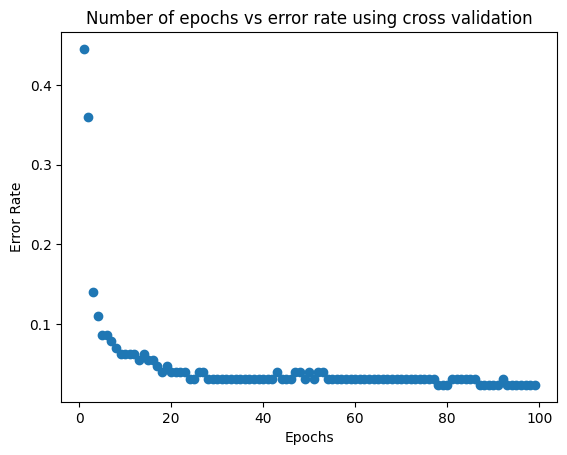

In [34]:
plt.scatter(range(1,100), error_rate)

plt.title("Number of epochs vs error rate using cross validation")
plt.xlabel("Epochs")
plt.ylabel("Error Rate")